In [1]:
import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from bs4 import BeautifulSoup

In [2]:
sns.set(style='whitegrid',font='SimHei',palette='Set2')
plt.rcParams['axes.unicode_minus']=False

In [ ]:
df=pd.read_excel('drama_data_cleaned.xlsx')
df.drop('Unnamed: 0',axis=1,inplace=True)
df['order'] = df['order'].astype(float)  # 确保order是数值类型

## 数据概览

In [4]:
df.head()

,title,score,order,time,table,area
0,鬼灭之刃 刀匠村篇,9.2,1564.5,2023,漫画改 奇幻 热血 战斗,日本
1,鬼灭之刃 游郭篇,9.7,1409.3,2022,漫画改 热血 战斗 奇幻,日本
2,鬼灭之刃 无限列车篇,9.8,1333.0,2021,漫画改 热血 战斗 奇幻,日本
3,鬼灭之刃,9.7,1267.4,2019,漫画改 战斗 热血 声控,日本
4,咒术回战 第二季,9.4,1242.3,2023,漫画改 热血 战斗 奇幻,日本


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2674 entries, 0 to 2673
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   2674 non-null   object 
 1   score   2674 non-null   float64
 2   order   2674 non-null   float64
 3   time    2674 non-null   int64  
 4   table   2625 non-null   object 
 5   area    2674 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 125.5+ KB


In [6]:
df.isna().sum()

title     0
score     0
order     0
time      0
table    49
area      0
dtype: int64

In [7]:
df['table']=df['table'].fillna('未知')

In [8]:
df.describe()

,score,order,time
count,2674.000000,2674.000000,2674.000000
mean,9.129170,81.757031,2013.071429
std,1.020593,151.044448,8.344154
min,2.200000,1.900000,1928.000000
25%,9.000000,6.900000,2009.000000
50%,9.500000,23.250000,2015.000000
75%,9.700000,78.300000,2019.000000
max,9.900000,1564.500000,2023.000000


## 动漫番剧地区分布条形图

In [9]:
area_value_counts=df['area'].value_counts()
area_value_counts

area
日本      2551
美国        84
英国        28
加拿大        3
中国大陆       2
韩国         2
芬兰         2
法国         1
荷兰         1
Name: count, dtype: int64

C:\Users\25778\AppData\Local\Temp\ipykernel_21560\585307945.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(area_counts, x='area', y='count', palette='viridis')#柱状图,离散


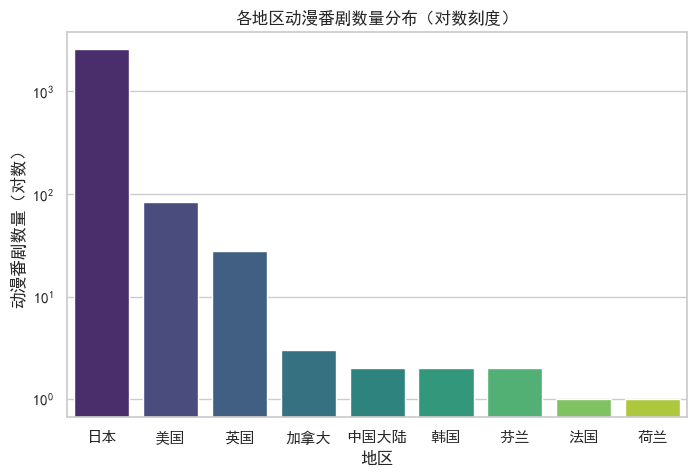

In [10]:
plt.figure(figsize=(8,5))
area_counts=area_value_counts.reset_index()
area_counts.columns=['area','count']
#value_counts()返回的是一个Series，调用.reset_index(),将原来的索引（地区名）变成一个新的列，默认列名为'index',自动生成新的数字索引（0,1,2...）
sns.barplot(area_counts, x='area', y='count', palette='viridis')#柱状图,离散
plt.yscale('log')  # 纵坐标改成对数刻度
plt.title('各地区动漫番剧数量分布（对数刻度）')
plt.xlabel('地区')
plt.ylabel('动漫番剧数量（对数）')
plt.show()


## 动漫番剧地区分布扇形图

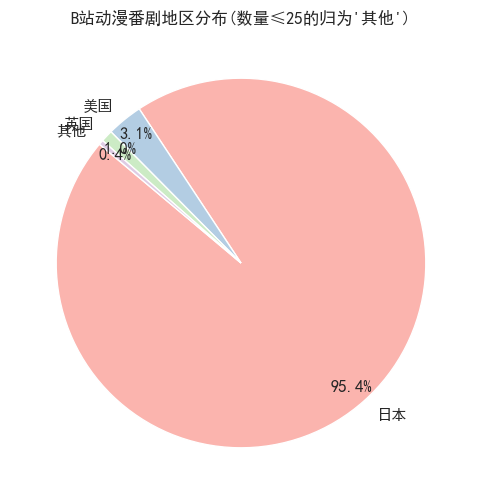

In [11]:
plt.figure(figsize=(6,6))
most_area=area_counts[area_counts['count']>25]
other=pd.DataFrame({
    'area':['其他'],
    'count':[area_counts[area_counts['count']<=25]['count'].sum()]
})
plot_data=pd.concat([most_area,other])
plt.pie(
    plot_data["count"],
    labels=plot_data['area'],
    autopct='%.1f%%',
    colors=plt.cm.Pastel1.colors,
    pctdistance=0.9,
    startangle=140
        )
plt.title('B站动漫番剧地区分布(数量≤25的归为\'其他\')')
plt.show()

## 动漫番剧出品地区分布分析

### 主要国家占比（扇形图）:
日本 95.4%,美国 3.1%,英国 1%, 其他 0.4%

**原因**：
1. 日本动画产业成熟，产业链完整
2. 美国主攻3D动画电影
3. 欧洲以艺术短片为主
4. 其他国家产量较少

### 对数柱状图扩展

1. **数量差距太大**  :日本产量是其他国家的几百倍,普通柱状图会让小国家完全看不见

2. **看清所有国家**  :对数缩放后，小国家的数据也能显示,方便比较不同规模的市场

3. **发现潜力市场**  :能看到虽然占比小但增长快的国家,比如中国、韩国等新兴市场

**总结**：扇形图看大头，对数柱状图看细节，两者结合才能全面了解行业分布。

## 动漫番剧评分密度分布和直方图

<function matplotlib.pyplot.show(close=None, block=None)>

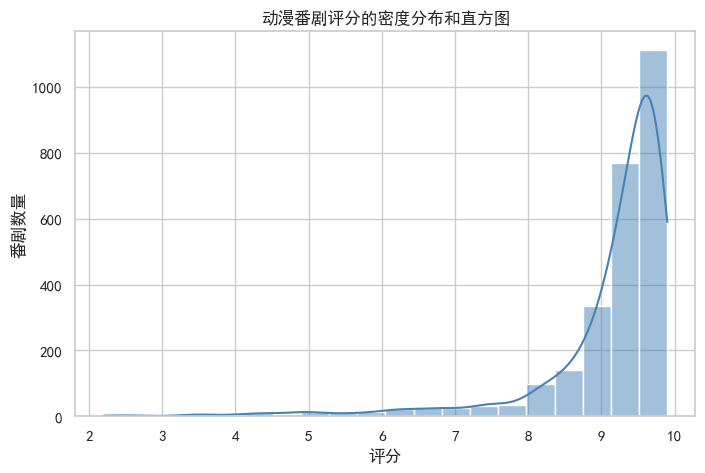

In [12]:
plt.figure(figsize=(8,5))#设置画布大小，横8，竖5
sns.histplot(df['score'],bins=20,kde=True,color='steelblue')#分20个小区间，颜色是天蓝色,kde=True 代表画出一条平滑的线
plt.title('动漫番剧评分的密度分布和直方图')
plt.xlabel('评分')
plt.ylabel('番剧数量')
plt.show

## 评分分布分析
整体评分集中在 **9.5 分** 附近，部分作品甚至能达到 **9.9 分**。

### 评分偏高的原因
1. **评分门槛机制**  
  B 站要求用户必须看完该集才能评分，自然筛选掉了中途弃番的用户，导致评分样本偏向于"能看下去"的观众。
2. **粉丝滤镜效应**  
  动漫类作品的评分不仅反映制作质量，还会受到原作情怀、IP 影响力等外部因素影响。

### 评分参考标准(B站用户约定俗成的特色指标)
| 评分区间 | 作品评价                     |
|----------|----------------------------|
| 9.9      | 公认神作                     |
| ≥9.5     | 整体优秀，偶有微小瑕疵        |
| ≥9.0     | 可轻松观看，无需深究逻辑      |
| <8.0     | 存在明显制作或剧本问题         |

## 动漫番剧数量和评分趋势图

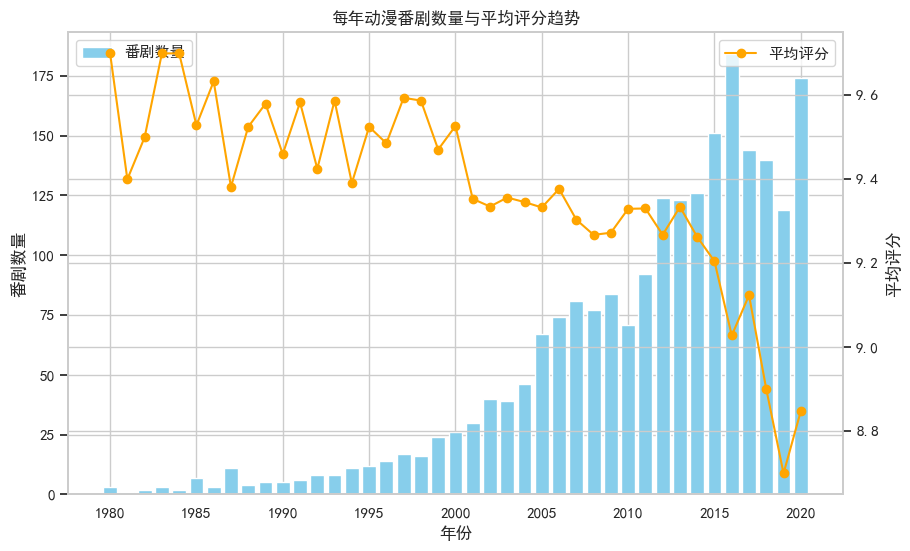

In [13]:
grouped=df.groupby('time').agg({'title':'count','score':'mean'}).reset_index()
grouped = grouped[(grouped['time'] >= 1980) & (grouped['time'] <= 2020)]
fig,ax1=plt.subplots(figsize=(10,6))
ax2=ax1.twinx()
ax1.bar(grouped['time'],grouped['title'],color='skyblue',label='番剧数量')
ax2.plot(grouped['time'],grouped['score'],color='orange',label='平均评分',marker='o')
ax1.set_xlabel('年份')
ax1.set_ylabel('番剧数量')
ax2.set_ylabel('平均评分')
ax1.legend()
ax2.legend()
plt.title('每年动漫番剧数量与平均评分趋势')
plt.show()

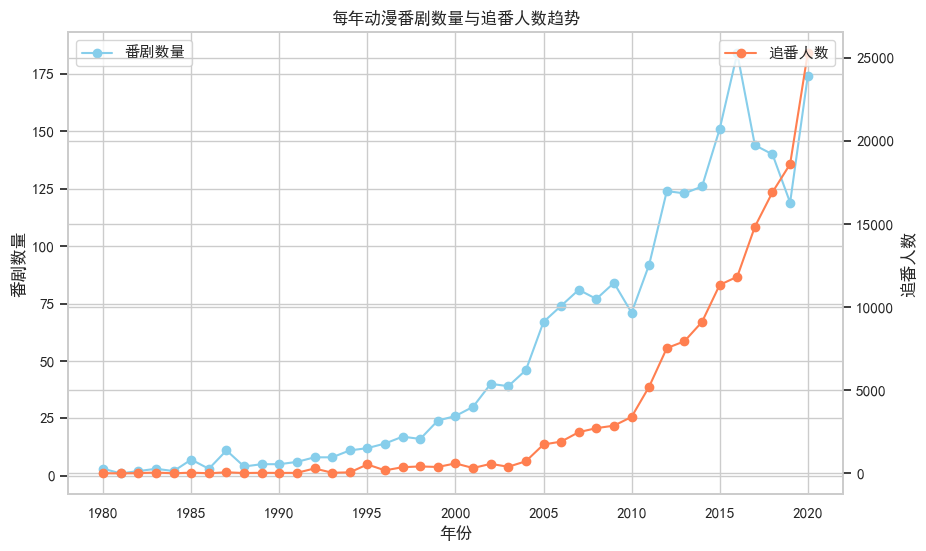

In [14]:
grouped=df.groupby('time').agg({'title':'count','order':'sum'}).reset_index()
grouped = grouped[(grouped['time'] >= 1980) & (grouped['time'] <= 2020)]
fig,ax1=plt.subplots(figsize=(10,6))
ax2=ax1.twinx()
ax1.plot(grouped['time'],grouped['title'],color='skyblue',label='番剧数量',marker='o')
ax2.plot(grouped['time'],grouped['order'],color='coral',label='追番人数',marker='o')
ax1.set_xlabel('年份')
ax1.set_ylabel('番剧数量')
ax2.set_ylabel('追番人数')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('每年动漫番剧数量与追番人数趋势')
plt.show()

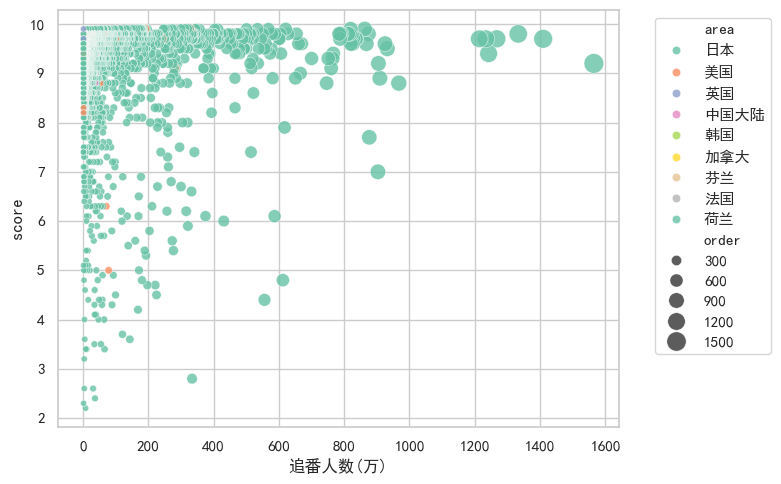

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='order',y='score',alpha=0.8,palette='Set2',hue='area',size='order',sizes=(20,200))
plt.title='评分与追番人数关系(气泡大小=追番人数)'
plt.xlabel('追番人数(万)')
plt.ylabel=('评分')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()
plt.show()

## 动漫番剧与观众趋势分析（1980-2020）

### 产量与观众规模
- **整体发展**：
  1. 动画产业呈现持续扩张态势,2000年后进入加速发展阶段
  2. 观众规模的增长存在明显滞后性,在产业扩张约十年后才出现显著提升,在2020年达到顶峰.
  3. 2010年是产业规模与受众群体同步爆发的关键时期

- **三个发展阶段**：
  - **萌芽期（1980-1999）**：产业规模有限，年产量维持在较低水平
  - **扩张期（2000-2009）**：制作数量开始稳定增长
  - **爆发期（2010-2020）**：产量突破历史峰值，观众规模呈指数级增长
  

### 产量与作品质量关系
- **长期趋势**：
  1. 产量增长与平均评分存在明显负相关
  2. 早期（1980年代）作品普遍获得较高评价
  3. 2010年后随着产量激增,平均评分波动加剧且整体下降

- **关键点**：
  1. 2013年前后：产量突破100部,平均评分开始持续下降
  2. 2019年：平均评分达到历史低位,市场出现饱和迹象

### 受众规模与作品质量
- **整体规律**：
  1. 大众关注度与作品质量呈现正相关关系
  2. 高人气作品（追番人数>1000万）均保持较高评分基准
  3. 中低关注度区间存在明显的质量分化现象:  
  - 大部分番剧的追番人数在0-400万,导致该区域气泡密集,同时该区域内小部分番剧评分低于8分;  
  - 追番人数400-1000万的番剧大部分评分在9分以上
- **地域分布**：
  1. 日本作品占据绝对主导地位
  2. 非日本产区的作品普遍关注度较低,但质量分布区间较大

## 动漫番剧类型词云对比

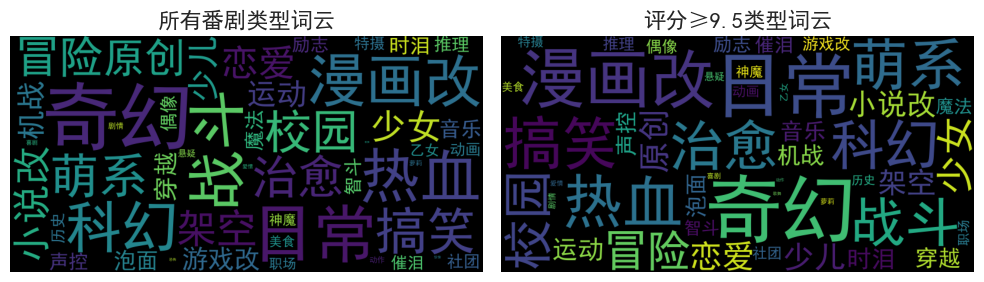

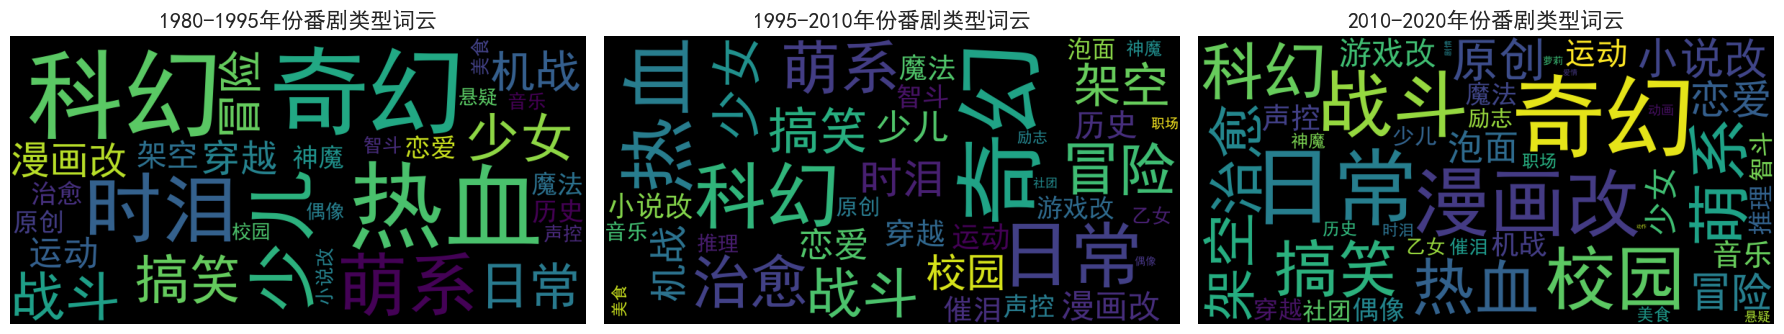

=== 各分组类型出现次数统计 ===


,所有番剧,高分番剧(≥9.5),1980-1995,1995-2010,2010-2020
奇幻,836,396,38,260,403
日常,571,360,9,159,339
热血,516,249,38,187,188
战斗,509,202,10,88,264
漫画改,476,295,5,30,272
科幻,460,208,39,164,186
搞笑,370,238,10,74,190
萌系,329,223,18,101,195
校园,311,177,1,45,236
治愈,296,205,2,98,150


In [16]:
import re
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
font_path='./simhei.ttf' 
def clean_type(text):
    """清洗类型内部文本，保留中英文并去除特殊符号"""
    if pd.isna(text):
        return ''
    return re.sub(r'[^\u4e00-\u9fa5a-zA-Z]', '', str(text)).strip()

def get_type_counts(df):
    types = df['table'].dropna().str.split(' ', expand=True).stack()
    cleaned = types.apply(clean_type)
    return cleaned[~cleaned.isin(['未知', '其他']) & (cleaned != '')].value_counts()

# 转换评分列为数值类型
df['score'] = pd.to_numeric(df['score'], errors='coerce')

# 生成全局词云和高分词云数据
all_freq = get_type_counts(df)
high_freq = get_type_counts(df[df['score'] >= 9.5])

# 第一张图：所有番剧和评分≥9.5的词云（1行2列）
fig1, axes1 = plt.subplots(1, 2, figsize=(10, 4))
for ax, freq, title in zip(axes1, [all_freq, high_freq], ['所有番剧类型', '评分≥9.5类型']):
    wc = WordCloud(width=800, height=400, background_color='black', font_path=font_path).generate_from_frequencies(freq.to_dict())
    ax.imshow(wc)
    ax.set_title(f'{title}词云', fontsize=16)
    ax.axis('off')

plt.tight_layout()
plt.show()

# 生成各时间段的词云数据
time_ranges = [
    ('1980-1995', (1980, 1995)),
    ('1995-2010', (1995, 2010)),
    ('2010-2020', (2010, 2020))
]

# 第二张图：三个时间段的词云（1行3列）
fig2, axes2 = plt.subplots(1, 3, figsize=(18, 5))
for ax, (time_range, (start, end)) in zip(axes2, time_ranges):
    time_df = df[(df['time'] >= start) & (df['time'] <= end)]
    time_freq = get_type_counts(time_df)
    
    wc = WordCloud(width=800, height=400, background_color='black', 
                  font_path=font_path).generate_from_frequencies(time_freq.to_dict())
    ax.imshow(wc)
    ax.set_title(f'{time_range}年份番剧类型词云', fontsize=16)
    ax.axis('off')

plt.tight_layout()
plt.show()

# 定义分组
groups = {
    "所有番剧": df,
    "高分番剧(≥9.5)": df[df['score'] >= 9.5],
    "1980-1995": df[(df['time'] >= 1980) & (df['time'] <= 1995)],
    "1995-2010": df[(df['time'] >= 1995) & (df['time'] <= 2010)],
    "2010-2020": df[(df['time'] >= 2010) & (df['time'] <= 2020)]
}

# 统计各分组类型频次
count_dfs = []
for name, group_df in groups.items():
    counts = get_type_counts(group_df)  
    if not counts.empty:
        count_df = pd.DataFrame({name: counts})
        count_dfs.append(count_df)

# 合并所有统计结果
result = pd.concat(count_dfs, axis=1).fillna(0).astype(int)

# 打印统计表格
print("=== 各分组类型出现次数统计 ===")
display(result)

## 动漫番剧类型词云图分析

### 所有番剧与高分番剧对比

**主流类型**:
1. 主流类型奇幻、日常和热血类作品在高分番剧中仍保持稳定优势。

2. 日常类作品在高分段占比提升最为显著，漫画改编作品的高分出现率也明显优于平均水平。

**质量特征**:
1. 情感向作品整体表现优异，其中治愈、萌系、搞笑类作品更容易获得高评价。

2. 架空、战斗等制作要求高的类型呈现精品化趋势。

### 不同时期类型演变

- **1980-1995黄金期特征**:
科幻和热血类作品占据主导地位，传统少年向题材盛行，整体类型选择较为有限。

- **1995-2010过渡期变化**:
日常系、治愈类作品开始崛起，热血、奇幻、科幻等传统类型仍占据主流，类型细分趋势加剧。

- **2010-2020新时期发展**:
日常类成为最主流类型，漫画改编作品快速增长，少女、少儿类型逐渐减少,类型融合成为创作新趋势。

### 多维演化动因

1. **市场需求**：观众偏好从热血型向日常型转变，反映社会压力增大背景下对轻松内容的需求增长

2. **技术支持**：制作技术进步使得高精度类型能够实现精品化，推动行业标准提升

3. **内容变化**：漫画、小说改编等新形式的崛起改变了类型分布，带来新的创作视角

